In [12]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt


In [14]:

rows = []

fichiers_invalides = []

for filename in os.listdir("recoltes"):
    filepath = os.path.join("recoltes", filename)

    if not filename.endswith(".json"):
        continue

    try:
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)

        for p in data:
            rows.append({
                "parking": p["name"]["value"],
                "date": p["availableSpotNumber"]["metadata"]["timestamp"]["value"],
                "places_libres": p["availableSpotNumber"]["value"],
                "capacite": p["totalSpotNumber"]["value"]
            })

    except Exception as e:
        fichiers_invalides.append(filename)

df = pd.DataFrame(rows)

print("Fichiers ignorés (invalides ou vides) :")
print(fichiers_invalides)

df.head()


Fichiers ignorés (invalides ou vides) :
['recolte_2026-01-09_16-23-53.json', 'recolte_2026-01-09_16-23-59.json', 'recolte_2026-01-10_16-42-27.json', 'recolte_2026-01-11_02-35-58.json', 'recolte_2026-01-11_02-36-58.json', 'recolte_2026-01-11_02-37-58.json', 'recolte_2026-01-11_02-38-59.json', 'recolte_2026-01-11_02-39-59.json', 'recolte_2026-01-11_02-40-59.json', 'recolte_2026-01-11_02-41-59.json', 'recolte_2026-01-11_02-43-00.json', 'recolte_2026-01-11_02-44-00.json', 'recolte_2026-01-11_02-45-00.json', 'recolte_2026-01-11_02-46-00.json', 'recolte_2026-01-11_02-47-01.json', 'recolte_2026-01-11_02-48-01.json', 'recolte_2026-01-11_02-49-01.json', 'recolte_2026-01-11_02-50-01.json', 'recolte_2026-01-11_02-51-02.json', 'recolte_2026-01-11_23-44-00.json', 'recolte_2026-01-11_23-45-00.json', 'recolte_2026-01-11_23-46-01.json', 'recolte_2026-01-11_23-47-01.json', 'recolte_2026-01-11_23-48-02.json', 'recolte_2026-01-11_23-49-02.json', 'recolte_2026-01-11_23-50-02.json', 'recolte_2026-01-11_23-

,parking,date,places_libres,capacite
0,Antigone,2026-01-09T08:20:17.000Z,147,239
1,Comedie,2026-01-09T08:20:29.000Z,443,664
2,Corum,2026-01-09T08:20:17.000Z,295,480
3,Europa,2026-01-09T08:20:17.000Z,382,591
4,Foch,2026-01-09T08:20:39.000Z,592,620


In [15]:
df["date"] = pd.to_datetime(df["date"])

df["jour"] = df["date"].dt.day_name()
df["heure"] = df["date"].dt.hour


In [16]:
df["occupation"] = 1 - (df["places_libres"] / df["capacite"])
df["occupation_pct"] = df["occupation"] * 100

df.head()


,parking,date,places_libres,capacite,jour,heure,occupation,occupation_pct
0,Antigone,2026-01-09 08:20:17+00:00,147,239,Friday,8,0.384937,38.493724
1,Comedie,2026-01-09 08:20:29+00:00,443,664,Friday,8,0.332831,33.283133
2,Corum,2026-01-09 08:20:17+00:00,295,480,Friday,8,0.385417,38.541667
3,Europa,2026-01-09 08:20:17+00:00,382,591,Friday,8,0.353638,35.363790
4,Foch,2026-01-09 08:20:39+00:00,592,620,Friday,8,0.045161,4.516129


In [17]:
df["occupation_pct"].describe()


count    9816.000000
mean       42.331629
std        23.798735
min         0.000000
25%        28.801214
50%        36.875000
75%        60.162602
max       100.000000
Name: occupation_pct, dtype: float64

In [18]:
occ_parking = (
    df.groupby("parking")["occupation_pct"]
    .mean()
    .sort_values(ascending=False)
)

occ_parking



parking
Gaumont OUEST        98.000000
Euromedecine         69.467320
Arc de Triomphe      69.018671
Gambetta             61.941493
Gaumont-Circe        60.200000
Sabines              50.245786
Corum                49.779951
Comedie              47.466271
Polygone             46.991104
Gare                 46.734674
Vicarello            44.044163
Charles de Gaulle    41.697386
Antigone             41.494205
Triangle             36.866359
Mosson               34.668138
Occitanie            33.889518
Europa               32.210542
Gaumont EST          32.110092
Pitot                31.694915
Saint Jean Le Sec    23.384378
Sablassou            21.487507
Circe                17.499593
Foch                 14.352473
Garcia Lorca         10.714548
Name: occupation_pct, dtype: float64

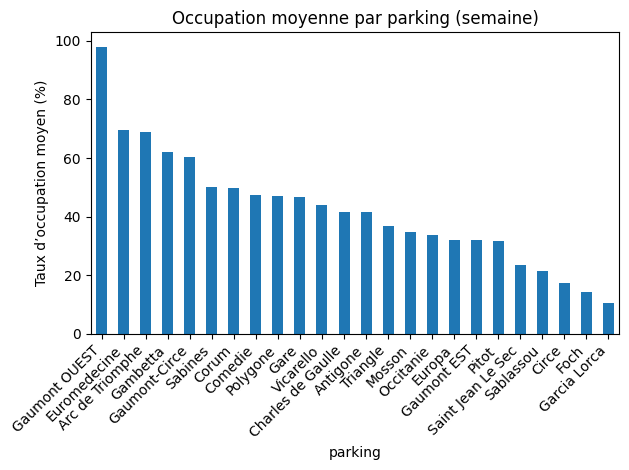

In [19]:
occ_parking.plot(kind="bar")
plt.ylabel("Taux d’occupation moyen (%)")
plt.title("Occupation moyenne par parking (semaine)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [20]:
occ_jour = df.groupby("jour")["occupation_pct"].mean()
occ_jour


jour
Friday       51.509556
Monday       37.959434
Saturday     39.025188
Sunday       29.566360
Tuesday      60.955723
Wednesday    42.167533
Name: occupation_pct, dtype: float64

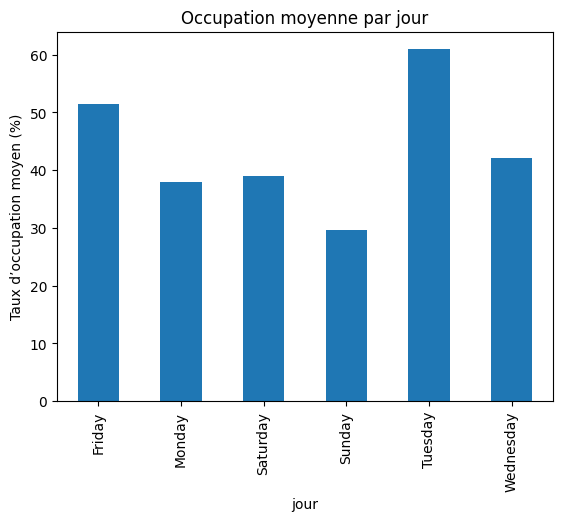

In [21]:
occ_jour.plot(kind="bar")
plt.ylabel("Taux d’occupation moyen (%)")
plt.title("Occupation moyenne par jour")
plt.show()


In [22]:
occ_heure = df.groupby("heure")["occupation_pct"].mean()
occ_heure


heure
0     28.441782
1     26.960212
2     26.736007
3     27.788706
4     27.535209
5     26.871557
6     27.413215
7     28.482103
8     36.507686
9     43.275999
10    48.858388
11    49.580124
12    41.396891
13    46.797660
14    48.918777
15    59.412874
16    40.478455
17    39.088376
18    37.223868
19    36.451676
20    36.907076
21    33.607622
22    32.007698
23    30.342418
Name: occupation_pct, dtype: float64

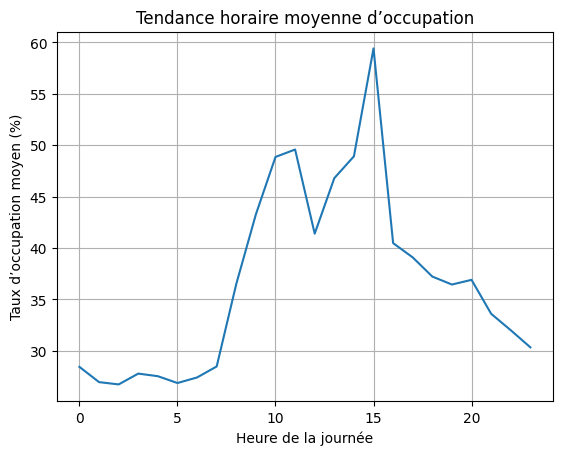

In [23]:
occ_heure.plot()
plt.ylabel("Taux d’occupation moyen (%)")
plt.xlabel("Heure de la journée")
plt.title("Tendance horaire moyenne d’occupation")
plt.grid(True)
plt.show()


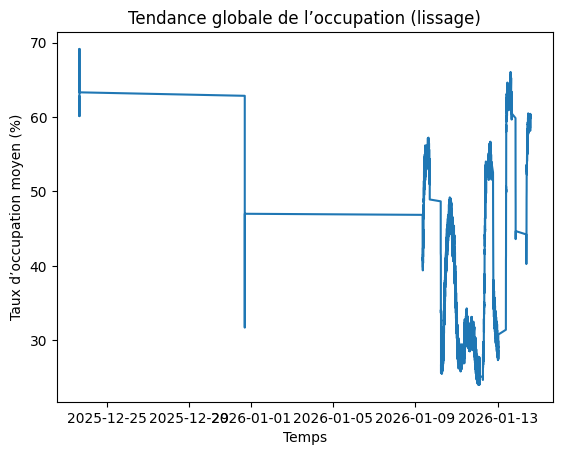

In [24]:
df_sorted = df.sort_values("date")
trend = df_sorted["occupation_pct"].rolling(window=50).mean()

plt.plot(df_sorted["date"], trend)
plt.ylabel("Taux d’occupation moyen (%)")
plt.xlabel("Temps")
plt.title("Tendance globale de l’occupation (lissage)")
plt.show()


In [25]:
saturation = df[df["occupation_pct"] > 90]
saturation[["parking", "date", "occupation_pct"]]


,parking,date,occupation_pct
19,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000
43,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000
67,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000
91,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000
115,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000
...,...,...,...
9739,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000
9763,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000
9774,Gare,2026-01-14 13:55:16+00:00,90.243902
9787,Gaumont OUEST,2025-12-23 15:36:31+00:00,98.000000


In [26]:
saturation.groupby("parking").size().sort_values(ascending=False)


parking
Gaumont OUEST      409
Euromedecine        49
Corum                9
Gare                 9
Mosson               8
Arc de Triomphe      7
Vicarello            7
dtype: int64

In [27]:
print("Parkings les plus occupés sur la semaine :")
print(occ_parking.head(3))

print("\nParkings les moins occupés sur la semaine :")
print(occ_parking.tail(3))


Parkings les plus occupés sur la semaine :
parking
Gaumont OUEST      98.000000
Euromedecine       69.467320
Arc de Triomphe    69.018671
Name: occupation_pct, dtype: float64

Parkings les moins occupés sur la semaine :
parking
Circe           17.499593
Foch            14.352473
Garcia Lorca    10.714548
Name: occupation_pct, dtype: float64
